# Group HWA1 - 2

Draw $X$ from density $g(x)$
- the upper bound $\overline{h}_n(x) = \log\{M_ng_n(x)\}$
- $\overline{h}_n(x) = \log\{M_ng_n(x)\}$ is formed by piecewise linear functions 
- It is formed by $r_n$ linear functions<br>
$$
g_n(x) = M_n^{-1} \left\{
    \exp(a_{-1} + b_{-1} x) 1_{[-\infty, x_0]}(x) + 
    \sum_{j=0}^{r_n} \exp(a_j + b_j x) 1_{[x_j, x_{j+1}]}(x) + 
    \exp(a_{r_n+1} + b_{r_n+1} x) 1_{[x_{r_n+1}, \infty]}(x)
\right\}
$$
where $M_n$ is the normalizaing constant that makes $g_n(x)$ a density function.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# parameters


# Group HWA1 - 5

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Parameters
S_0 = 1
r = 0.05
sigma = 0.2
K = 1
M = 200
T = 1
N = 10000

In [ ]:
dt = T/M
np.random.seed(3407)
def get_S_values(S_0,r,sigma,K):
    S_values = [S_0]
    for i in range(0,M):
        z = np.random.normal(0,1)
        S_value = S_values[i] * np.exp((r - 0.5*sigma**2)*dt + 
                              sigma*np.sqrt(dt)*z)
        S_values.append(S_value)
    return S_values[:-1]


S = get_S_values(S_0,r,sigma,K)
print(f'S\'s shape: {len(S)}')

S's shape: 200


In [18]:
Asian_option_values = []
def  get_Asian_option_values(S,r,T,M,K):
    #S = S[1:]
    Asian = np.exp(-r*T)*np.maximum(np.mean(S)-K,0)
    return Asian

for i in range(0,N):
    S = get_S_values(S_0,r,sigma,K)
    Asian_option_values.append(get_Asian_option_values(S,r,T,M,K))

In [19]:
Asian_option_values = np.array(Asian_option_values)
Asian_option_values.mean()

0.05735175635564008

In [22]:
error = Asian_option_values.std()/np.sqrt(N)
print(f'Asian option value: {Asian_option_values.mean()}')
print(f'Error: {error}')

Asian option value: 0.05735175635564008
Error: 0.0007875480420342061


(array([4.638e+03, 2.370e+02, 2.770e+02, 2.350e+02, 2.410e+02, 2.400e+02,
        2.530e+02, 2.130e+02, 2.200e+02, 2.210e+02, 2.300e+02, 1.840e+02,
        2.060e+02, 1.850e+02, 1.700e+02, 1.570e+02, 1.490e+02, 1.480e+02,
        1.570e+02, 1.340e+02, 1.320e+02, 1.200e+02, 1.110e+02, 1.030e+02,
        1.030e+02, 8.600e+01, 7.800e+01, 7.900e+01, 5.900e+01, 6.900e+01,
        5.000e+01, 4.700e+01, 5.400e+01, 3.800e+01, 4.200e+01, 3.500e+01,
        2.900e+01, 3.700e+01, 2.100e+01, 2.900e+01, 2.200e+01, 2.000e+01,
        1.300e+01, 1.800e+01, 1.800e+01, 1.000e+01, 5.000e+00, 9.000e+00,
        5.000e+00, 5.000e+00, 8.000e+00, 3.000e+00, 1.000e+01, 2.000e+00,
        8.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

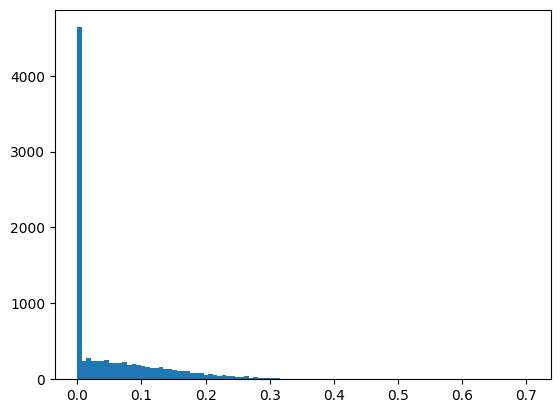

In [16]:
import matplotlib.pyplot as plt
plt.hist(Asian_option_values, bins=100)